In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler


import GPy

In [2]:
os.chdir('/home/saumya/Documents/Spec_data/Temp_Nu')

In [3]:
x_dat = np.load('abs_Nu_10000.npy').astype(np.half)

# x_dat_ss = x_dat
x_dat_t = StandardScaler().fit(x_dat)

x_dat_ss = x_dat_t.transform(x_dat)

# x_dat = np.reshape(x_dat, -1)[:, None]

In [4]:
x_dat.shape

(10000, 3000)

In [5]:
y_dat = np.load('/home/saumya/Documents/Spec_data/profiles/Temp_profile_10000.npy').astype(np.half)


# y_dat_ss = y_dat
y_dat_t = StandardScaler().fit(y_dat)

y_dat_ss = y_dat_t.transform(y_dat)
# y_dat = np.reshape(y_dat, -1)[:, None]

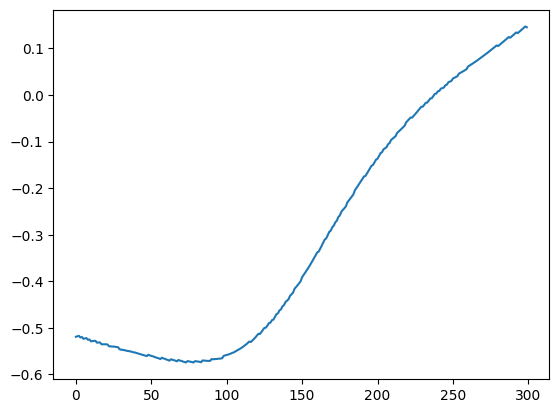

In [6]:
plt.plot(y_dat_ss[0])

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
def train_val_test_split(X, y, val_size):
    # test_size = 1 - train_size - val_size
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = val_size)
    # relative_train_size = train_size / (val_size + train_size)
    # X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                    #   train_size = relative_train_size, test_size = 1-relative_train_size)
    return X_train_val, X_test, y_train_val, y_test

In [9]:
X_train, X_test, Y_train, Y_test = train_val_test_split(x_dat, y_dat_ss, .2)

In [10]:
# LMC set up
ks = [GPy.kern.RBF(np.shape(X_train)[1]),GPy.kern.RBF(np.shape(X_train)[1]),GPy.kern.RBF(np.shape(X_train)[1]), GPy.kern.RBF(np.shape(X_train)[1])] 
icm = GPy.util.multioutput.LCM(input_dim=np.shape(X_train)[1],num_outputs=1,kernels_list=ks)

In [11]:
print(icm)
# 

  sum.                  |         value  |  constraints  |  priors
  ICM0.rbf.variance     |           1.0  |      +ve      |        
  ICM0.rbf.lengthscale  |           1.0  |      +ve      |        
  ICM0.B.W              |  [0.68801731]  |               |        
  ICM0.B.kappa          |           0.5  |      +ve      |        
  ICM1.rbf.variance     |           1.0  |      +ve      |        
  ICM1.rbf.lengthscale  |           1.0  |      +ve      |        
  ICM1.B.W              |  [0.01961809]  |               |        
  ICM1.B.kappa          |           0.5  |      +ve      |        
  ICM2.rbf.variance     |           1.0  |      +ve      |        
  ICM2.rbf.lengthscale  |           1.0  |      +ve      |        
  ICM2.B.W              |  [0.04133999]  |               |        
  ICM2.B.kappa          |           0.5  |      +ve      |        
  ICM3.rbf.variance     |           1.0  |      +ve      |        
  ICM3.rbf.lengthscale  |           1.0  |      +ve      |    

In [12]:
m = GPy.models.GPCoregionalizedRegression([X_train],[Y_train],kernel=icm)
# m['.*rbf.var'].constrain_fixed(1.)


# m['.*ICM.*var'].unconstrain()
# m['.*ICM0.*var'].constrain_fixed(1.)
# m['.*ICM0.*W'].constrain_fixed(0)
# m['.*ICM1.*var'].constrain_fixed(1.)
# m['.*ICM1.*W'].constrain_fixed(0)


# constrain if converge to reasonless extrema
# m['mixed_noise.Gaussian_noise_0.variance'].constrain_bounded(0,1e-5)
# m['mixed_noise.Gaussian_noise_1. variance'].constrain_bounded(0,1e-5)
# m['mixed_noise.Gaussian_noise_2.variance'].constrain_bounded(0,1e-5)
print(m)


Name : gp
Objective : 2939990.7652458744
Number of Parameters : 17
Number of Optimization Parameters : 17
Updates : True
Parameters:
  gp.                                    |         value  |  constraints  |  priors
  sum.ICM0.rbf.variance                  |           1.0  |      +ve      |        
  sum.ICM0.rbf.lengthscale               |           1.0  |      +ve      |        
  sum.ICM0.B.W                           |  [0.68801731]  |               |        
  sum.ICM0.B.kappa                       |           0.5  |      +ve      |        
  sum.ICM1.rbf.variance                  |           1.0  |      +ve      |        
  sum.ICM1.rbf.lengthscale               |           1.0  |      +ve      |        
  sum.ICM1.B.W                           |  [0.01961809]  |               |        
  sum.ICM1.B.kappa                       |           0.5  |      +ve      |        
  sum.ICM2.rbf.variance                  |           1.0  |      +ve      |        
  sum.ICM2.rbf.lengthscale

In [13]:
# print('W matrix\n',icm.B.W)
# print('\nkappa vector\n',icm.B.kappa)

In [14]:
m.optimize()

In [15]:
print(m)
# print('W matrix\n',icm.B.W)  

# print('\nkappa vector\n',icm.B.kappa)
# print('\nB matrix\n',icm.B.B)


Name : gp
Objective : 2760010.4958536597
Number of Parameters : 17
Number of Optimization Parameters : 17
Updates : True
Parameters:
  gp.                                    |                value  |  constraints  |  priors
  sum.ICM0.rbf.variance                  |   17.561214945263302  |      +ve      |        
  sum.ICM0.rbf.lengthscale               |    32.69707983872184  |      +ve      |        
  sum.ICM0.B.W                           |        [19.09217059]  |               |        
  sum.ICM0.B.kappa                       |   2.0153316184081995  |      +ve      |        
  sum.ICM1.rbf.variance                  |    1.787183289071728  |      +ve      |        
  sum.ICM1.rbf.lengthscale               |    15.28936381098059  |      +ve      |        
  sum.ICM1.B.W                           |         [0.06582882]  |               |        
  sum.ICM1.B.kappa                       |   1.2393308968114098  |      +ve      |        
  sum.ICM2.rbf.variance                  |   1.

In [16]:
newX = X_test
newX = np.concatenate((newX,np.zeros((np.shape(X_test)[0],1))),1)
noise_dict = {'output_index':newX[:,-1].astype(int)}
ys,var=m.predict(newX,Y_metadata=noise_dict)

# Temper_test_=scalerT.inverse_transform(ys)


In [17]:
ys

array([[-0.56438965, -0.56473293, -0.56497536, ..., -0.56768798,
        -0.56712959, -0.56640607],
       [ 0.67206944,  0.67207911,  0.67186828, ...,  0.75006205,
         0.74982785,  0.74938392],
       [-0.40835729, -0.41019038, -0.41206254, ..., -0.62339216,
        -0.62102237, -0.61793875],
       ...,
       [ 0.19584599,  0.196255  ,  0.19692339, ...,  0.08314952,
         0.08287438,  0.0826418 ],
       [-0.47491802, -0.47653129, -0.4776976 , ..., -0.53611381,
        -0.53494224, -0.53369029],
       [-0.06750516, -0.0683034 , -0.06930445, ...,  0.17535321,
         0.17638366,  0.17740443]])

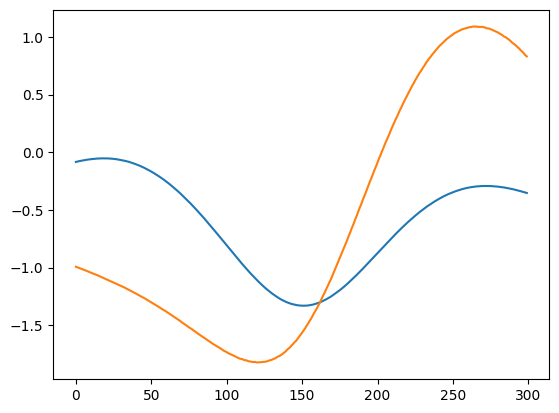

In [22]:
plt.plot(ys[10])
plt.plot(Y_test[10])

In [19]:
ys

array([[-0.56438965, -0.56473293, -0.56497536, ..., -0.56768798,
        -0.56712959, -0.56640607],
       [ 0.67206944,  0.67207911,  0.67186828, ...,  0.75006205,
         0.74982785,  0.74938392],
       [-0.40835729, -0.41019038, -0.41206254, ..., -0.62339216,
        -0.62102237, -0.61793875],
       ...,
       [ 0.19584599,  0.196255  ,  0.19692339, ...,  0.08314952,
         0.08287438,  0.0826418 ],
       [-0.47491802, -0.47653129, -0.4776976 , ..., -0.53611381,
        -0.53494224, -0.53369029],
       [-0.06750516, -0.0683034 , -0.06930445, ...,  0.17535321,
         0.17638366,  0.17740443]])

In [20]:
from sklearn import metrics

In [21]:
conc_1 = metrics.mean_squared_error(np.array(ys), np.array(Y_test))
print(f'The mean squared error between the real and predicted values are: {conc_1*100}%')

The mean squared error between the real and predicted values are: 57.82124180365671%
